# General Forecasting

## Libraries

### General

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pylab

pylab.rc("figure", figsize=(14, 8))
pylab.rc("font", size=14)

### Intro to Forecasting Models

In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Autocorrelation

In [179]:
import statsmodels.api as sm

## Intro to Forecasting Models

In [4]:
file_name = "/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/airline_passengers.csv"
df = pd.read_csv(file_name, index_col="Month", parse_dates=True)
df.index.freq = "MS"

In [7]:
df.isna().sum()

Thousands of Passengers    0
dtype: int64

In [8]:
df.columns

Index(['Thousands of Passengers'], dtype='object')

In [9]:
# df['Thousands of Passengers'].astype('float')

In [10]:
df['psg'] = df['Thousands of Passengers']

In [11]:
df.drop('Thousands of Passengers', axis=1, inplace=True)

In [12]:
def describe2(df):
    df_res = df.describe()
    df_res.loc['range'] = df_res.loc['max'] - df_res.loc['min']
    return df_res


describe2(df).T

,count,mean,std,min,25%,50%,75%,max,range
psg,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0,518.0


## Test Train Split

In [13]:
len(df) * 0.8

115.2

In [66]:
# Split the data
train = df.iloc[:109]
test = df.iloc[108:]

In [67]:
len(train)

109

In [68]:
# One data point overlaps
len(test)

36

In [69]:
# df.dropna(inplace=True)

In [70]:
# f_model = ExponentialSmoothing(train.psg, trend='mul', easonal_periods=12).fit()

In [119]:
a_mod = ExponentialSmoothing(train.psg,
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12)

In [120]:
f_a_mod = mod.fit()

In [121]:
# f_mod.fittedvalues.plot()

In [122]:
a_pred = f_a_mod.forecast(36 + 12)

In [123]:
m_mod = ExponentialSmoothing(train.psg,
                             trend='mul',
                             seasonal='mul',
                             seasonal_periods=12)

In [124]:
f_m_mod = mod.fit()

In [125]:
# f_mod.fittedvalues.plot()

In [126]:
m_pred = f_m_mod.forecast(36 + 12)

In [134]:
pred = f_m_mod.forecast(36)

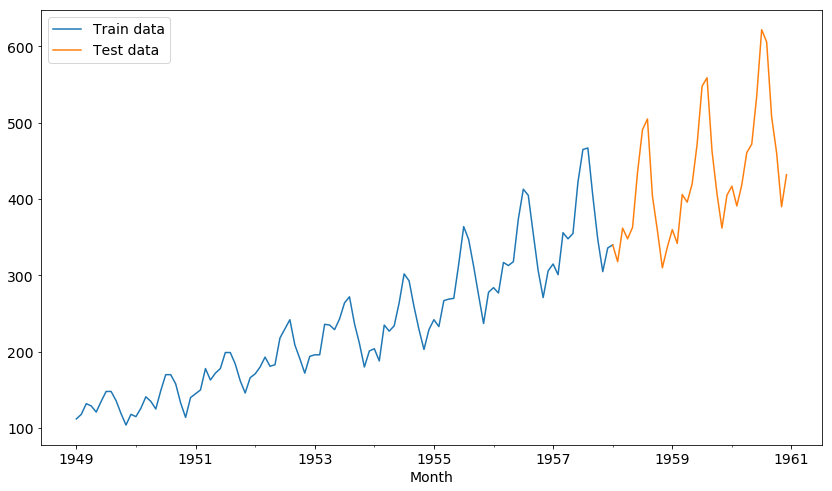

In [131]:
train.psg.plot(legend=True, label="Train data")
test.psg.plot(legend=True, label="Test data")

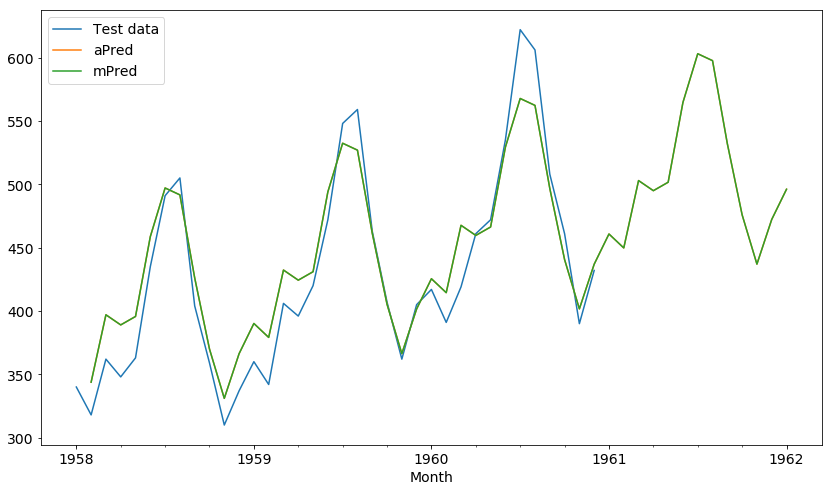

In [127]:
# train.psg.plot(legend=True, label="Train data")
test.psg.plot(legend=True, label="Test data")
a_pred.plot(legend=True, label="aPred")
m_pred.plot(legend=True, label="mPred")

## Evaluating Predicitions

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [138]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
psg,36.0,428.5,79.329152,310.0,362.0,412.0,472.0,622.0


In [136]:
mean_absolute_error(test, pred)

47.96975854011785

In [139]:
np.sqrt(mean_squared_error(test, pred))

55.544148619942845

In [142]:
final_mod = ExponentialSmoothing(df.psg,
                                 trend='mul',
                                 seasonal='mul',
                                 seasonal_periods=12).fit()

In [143]:
final_pred = final_mod.forecast(36)

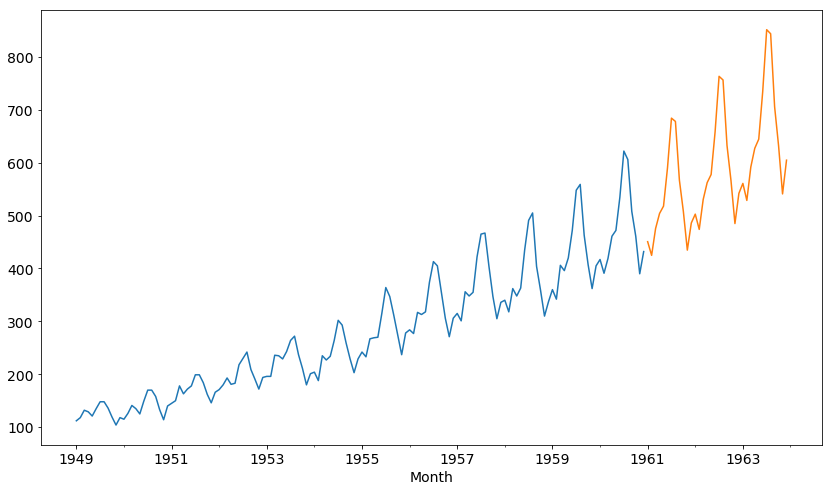

In [145]:
df.psg.plot()
final_pred.plot()

In [146]:
file_name2 = '/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/samples.csv'

In [148]:
# Stationary data example: does not exhibit trend of seasonality
df2 = pd.read_csv(file_name2, index_col=0, parse_dates=True)

In [149]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


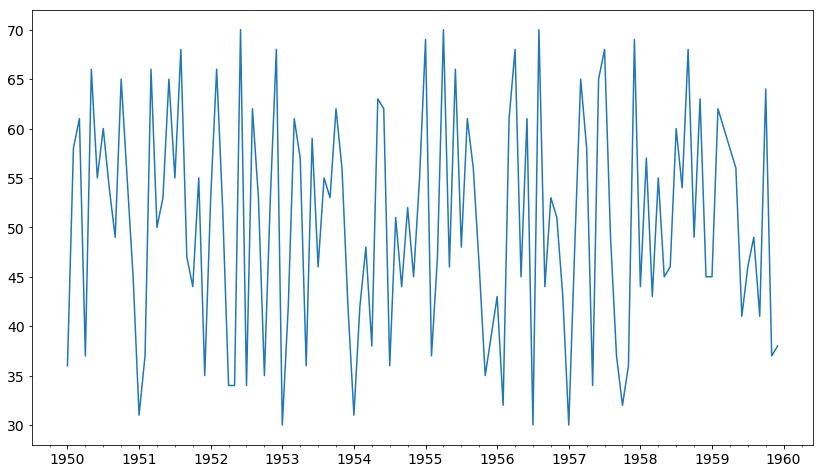

In [150]:
# Stationary data
df2.a.plot()

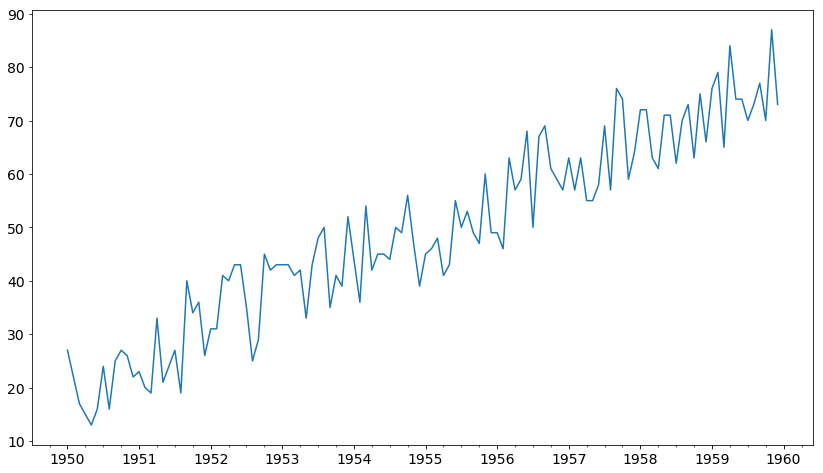

In [151]:
# Non-stationary data
df2.b.plot()

In [152]:
from statsmodels.tsa.statespace.tools import diff

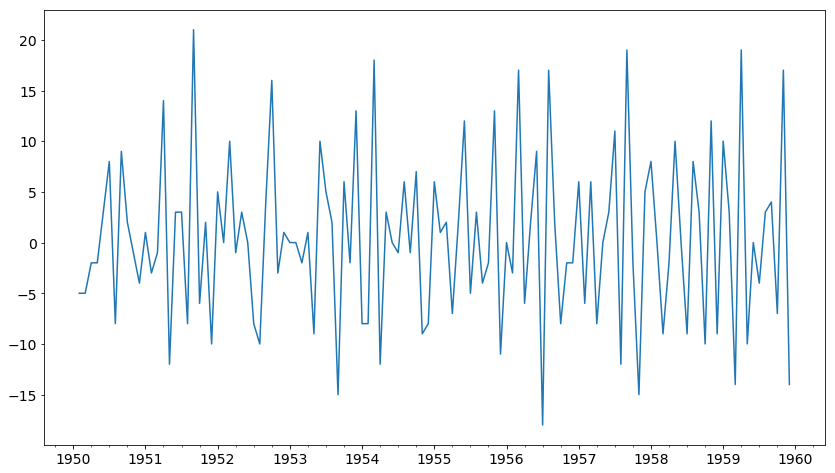

In [159]:
# df2.b - df2.b.shift(1)
diff(df2.b, k_diff=1).plot()

In [160]:
df2.b.head()

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
Name: b, dtype: int64

In [165]:
df2.b.shift(1).head()

1950-01-01     NaN
1950-02-01    27.0
1950-03-01    22.0
1950-04-01    17.0
1950-05-01    15.0
Name: b, dtype: float64

## Autocorrelation

In [256]:
# file_name = "/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/airline_passengers.csv"
# df = pd.read_csv(file_name, index_col="Month", parse_dates=True)
# df.index.freq = "MS"
# df['psg'] = df[df.columns[0]]
# df.drop(df.columns[0],axis=1,inplace=True)

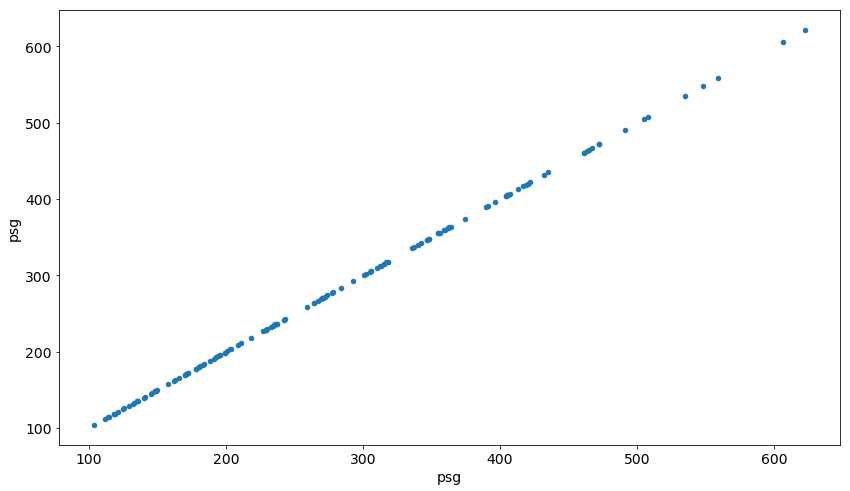

In [257]:
df.plot.scatter(x='psg', y='psg')

In [258]:
df['s_psg'] = df.psg.shift(-1)

In [259]:
df.head()

,psg,s_psg
Month,,
1949-01-01,112,118.0
1949-02-01,118,132.0
1949-03-01,132,129.0
1949-04-01,129,121.0
1949-05-01,121,135.0


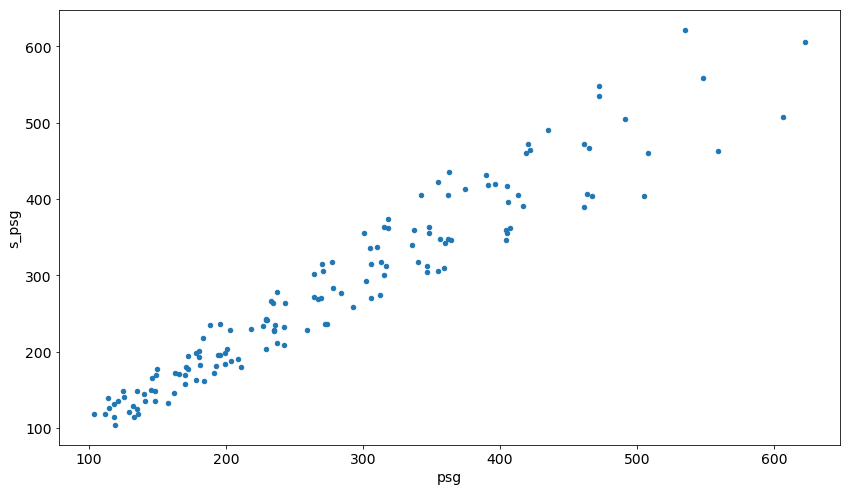

In [260]:
df.plot.scatter(x='psg', y='s_psg')

In [176]:
df.corr()

,psg,s_psg
psg,1.000000,0.960195
s_psg,0.960195,1.000000


In [181]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [188]:
# Non-stationary dataset
file1 = "/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/airline_passengers.csv"
df1 = pd.read_csv(file1, index_col="Month", parse_dates=True)
df1.index.freq = "MS"

In [203]:
# Stationary dataset
file2 = "/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/DailyTotalFemaleBirths.csv"
df2 = pd.read_csv(file2, index_col="Date", parse_dates=True)
df2.index.freq = "D"

In [192]:
df1.isna().sum()

Thousands of Passengers    0
dtype: int64

In [193]:
df2.isna().sum()

Births    0
dtype: int64

In [198]:
df1['psg'] = df1[df1.columns[0]]
df1.drop(df1.columns[0], axis=1, inplace=True)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
psg,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


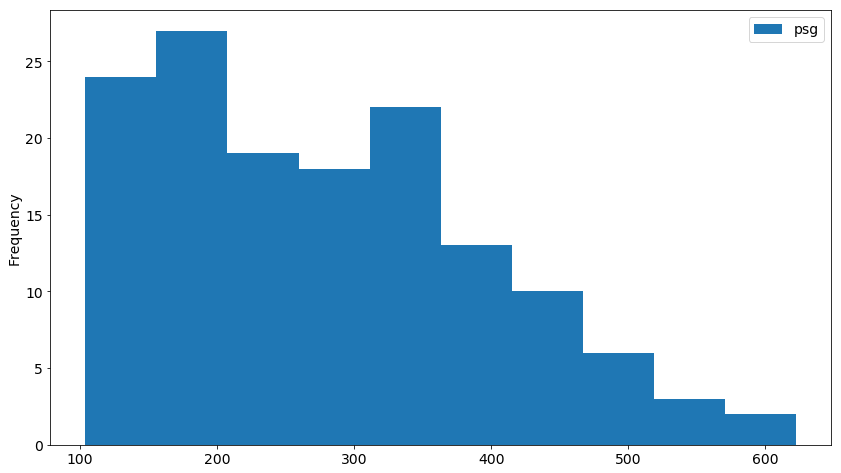

In [211]:
df1.plot.hist()

In [204]:
df2['birth'] = df2[df2.columns[0]]
df2.drop(df2.columns[0], axis=1, inplace=True)
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
birth,365.0,41.980822,7.348257,23.0,37.0,42.0,46.0,73.0


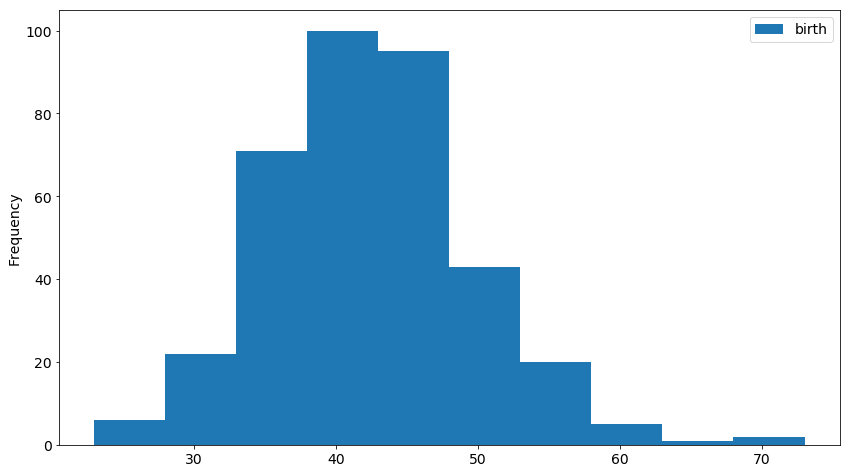

In [212]:
df2.plot.hist()

In [215]:
# import warnings
# warnings.filterwarnings('ignore')

In [247]:
# Simple Example
df = pd.DataFrame({'a': [13, 5, 11, 12, 9]})

In [248]:
# Use the populaiton mean for reduced Series
acf(df.a)

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [240]:
df['a1'] = df.a0.shift(-1)

In [241]:
# Differs from the ACF since it does not use the population mean to calculate the shifted correlation
df.corr()

,a0,a1
a0,1.000000,-0.576735
a1,-0.576735,1.000000


In [249]:
pacf_yw(df.a, nlags=len(df) - 1, method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [ ]:
pacf_yw(df.a, nlags=len(df) - 1)

/Users/aceituno/opt/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [252]:
pacf_ols(df.a, nlags=len(df) - 1)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [253]:
from pandas.plotting import lag_plot

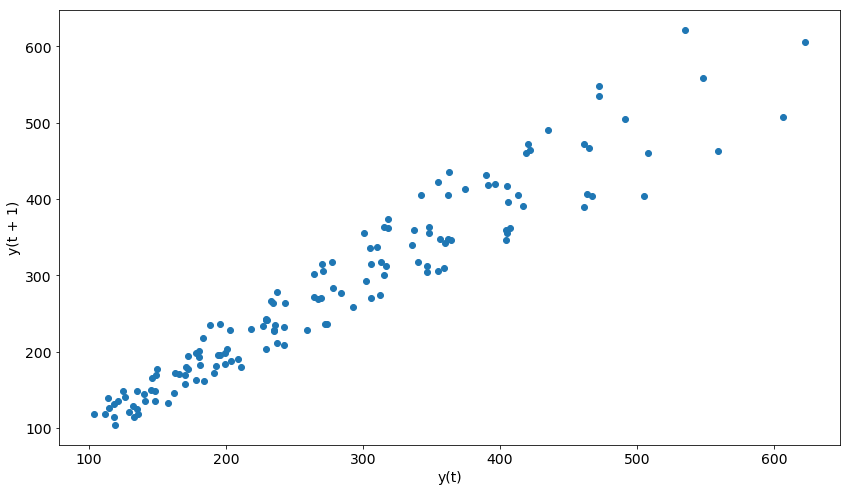

In [262]:
# See above
# df.plot.scatter(x='psg', y='s_psg')
lag_plot(df1.psg)

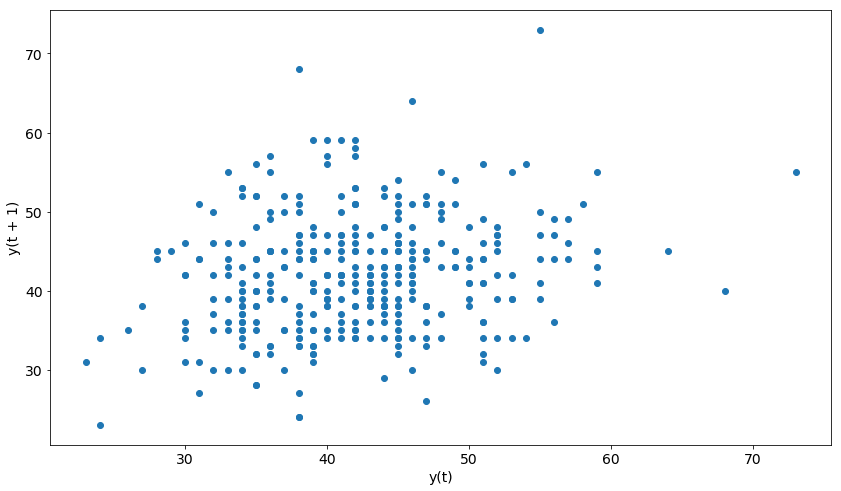

In [263]:
lag_plot(df2.birth)

In [264]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

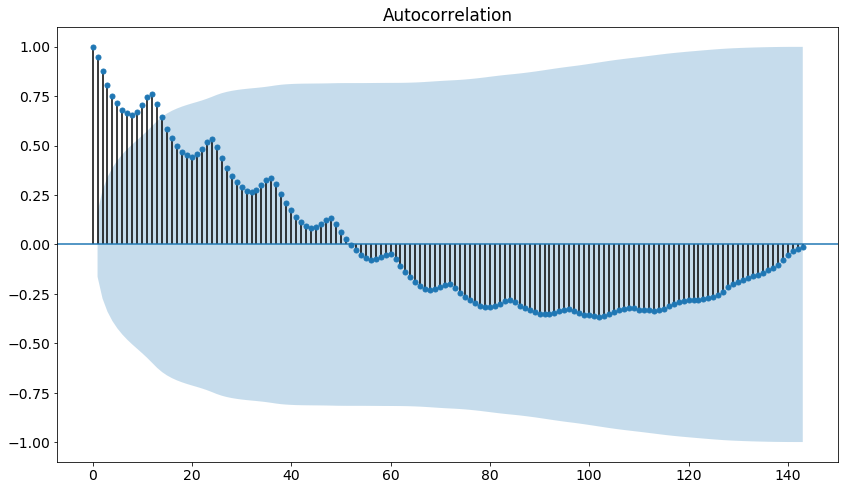

In [266]:
plot_acf(df1);

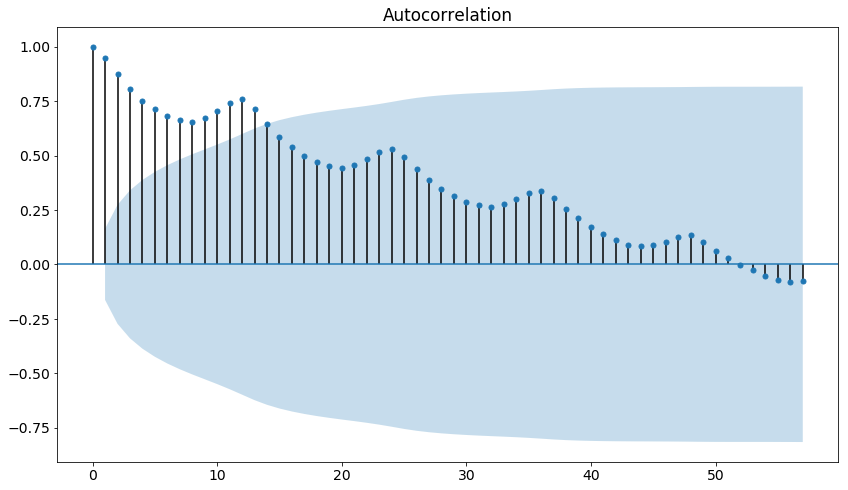

In [270]:
plot_acf(df1,lags=.4*len(df1));

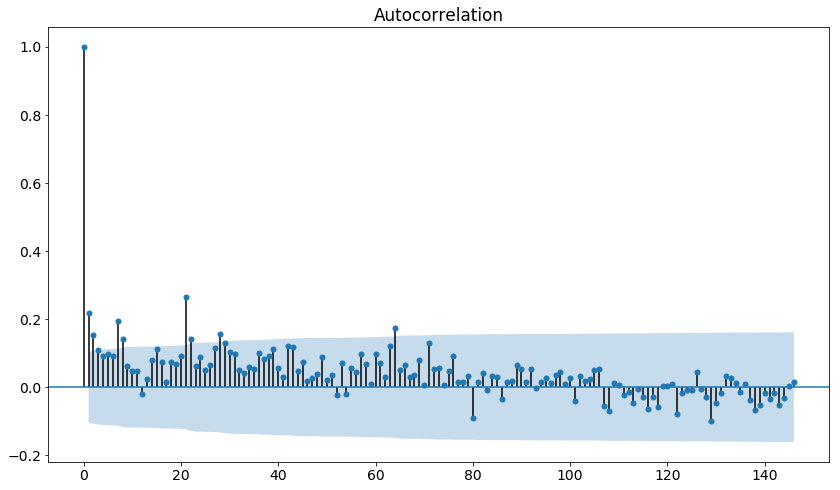

In [271]:
plot_acf(df2,lags=.4*len(df2));

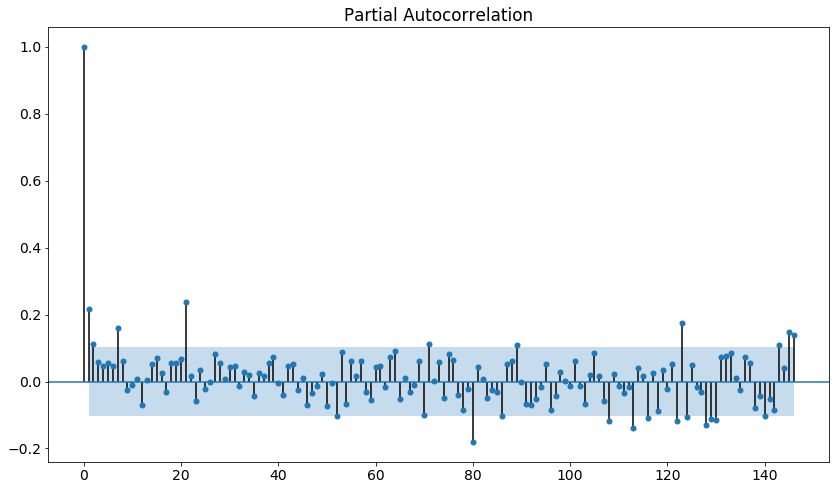

In [273]:
plot_pacf(df2,lags=.4*len(df2));

## ARIMA Overview